In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge



import warnings
warnings.filterwarnings("ignore")

### Getting data

In [2]:
corona=pd.read_csv("covid_19_india.csv",sep="\t")
corona.head(50)

Sno        Date     Time State/UnionTerritory  ConfirmedIndianNational  \
0     1  30-01-2020  6:00 PM               Kerala                        1   
1     2  31-01-2020  6:00 PM               Kerala                        1   
2     3  01-02-2020  6:00 PM               Kerala                        2   
3     4  02-02-2020  6:00 PM               Kerala                        3   
4     5  03-02-2020  6:00 PM               Kerala                        3   
5     6  04-02-2020  6:00 PM               Kerala                        3   
6     7  05-02-2020  6:00 PM               Kerala                        3   
7     8  06-02-2020  6:00 PM               Kerala                        3   
8     9  07-02-2020  6:00 PM               Kerala                        3   
9    10  08-02-2020  6:00 PM               Kerala                        3   
10   11  09-02-2020  6:00 PM               Kerala                        3   
11   12  10-02-2020  6:00 PM               Kerala                        3   
12   13  11-02-2020  6:00 PM               Kerala                        3   
13   14  12-02-2020  6:00 PM               Kerala                        3   
14   15  13-02-2020  6:00 PM               Kerala                        3   
15   16  14-02-2020  6:00 PM               Kerala                        3   
16   17  15-02-2020  6:00 PM               Kerala                        3   
17   18  16-02-2020  6:00 PM               Kerala                        3   
18   19  17-02-2020  6:00 PM               Kerala                        3   
19   20  18-02-2020  6:00 PM               Kerala                        3   
20   21  19-02-2020  6:00 PM               Kerala                        3   
21   22  20-02-2020  6:00 PM               Kerala                        3   
22   23  21-02-2020  6:00 PM               Kerala                        3   
23   24  22-02-2020  6:00 PM               Kerala                        3   
24   25  23-02-2020  6:00 PM               Kerala                        3   
25   26  24-02-2020  6:00 PM               Kerala                        3   
26   27  25-02-2020  6:00 PM               Kerala                        3   
27   28  26-02-2020  6:00 PM               Kerala                        3   
28   29  27-02-2020  6:00 PM               Kerala                        3   
29   30  28-02-2020  6:00 PM               Kerala                        3   
30   31  29-02-2020  6:00 PM               Kerala                        3   
31   32  01-03-2020  6:00 PM               Kerala                        3   
32   33  02-03-2020  6:00 PM            Telengana                        1   
33   34  02-03-2020  6:00 PM               Kerala                        3   
34   35  02-03-2020  6:00 PM                Delhi                        1   
35   36  03-03-2020  6:00 PM            Telengana                        1   
36   37  03-03-2020  6:00 PM            Rajasthan                        0   
37   38  03-03-2020  6:00 PM               Kerala                        3   
38   39  03-03-2020  6:00 PM                Delhi                        1   
39   40  04-03-2020  6:00 PM        Uttar Pradesh                        6   
40   41  04-03-2020  6:00 PM               Kerala                        3   
41   42  04-03-2020  6:00 PM              Haryana                        0   
42   43  04-03-2020  6:00 PM                Delhi                        1   
43   44  04-03-2020  6:00 PM            Telengana                        1   
44   45  04-03-2020  6:00 PM            Rajasthan                        1   
45   46  05-03-2020  6:00 PM                Delhi                        2   
46   47  05-03-2020  6:00 PM              Haryana                        0   
47   48  05-03-2020  6:00 PM               Kerala                        3   
48   49  05-03-2020  6:00 PM            Rajasthan                        1   
49   50  05-03-2020  6:00 PM            Telengana                        1   

    ConfirmedForeignNatio

### Checking names of the states

In [3]:
states=corona['State/UnionTerritory'].unique()
print(states)

['Kerala' 'Telengana' 'Delhi' 'Rajasthan' 'Uttar Pradesh' 'Haryana'
 'Ladakh' 'Tamil Nadu' 'Karnataka' 'Maharashtra' 'Punjab'
 'Jammu and Kashmir' 'Andhra Pradesh' 'Uttarakhand' 'Odisha' 'Puducherry'
 'West Bengal' 'Chhattisgarh' 'Chandigarh' 'Gujarat' 'Himachal Pradesh'
 'Madhya Pradesh' 'Bihar' 'Manipur' 'Mizoram'
 'Andaman and Nicobar Islands' 'Goa' 'Unassigned' 'Assam' 'Jharkhand'
 'Arunachal Pradesh' 'Tripura' 'Nagaland' 'Meghalaya' 'Dadar Nagar Haveli'
 'Cases being reassigned to states' 'Sikkim' 'Daman & Diu'
 'Dadra and Nagar Haveli and Daman and Diu' 'Telangana']


### Checking for NaN

In [4]:
corona.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

### Checking month of observations

In [5]:
mnthn=[]
for i in range(len(corona.Date)):
    mnthn.append(int(str(corona.Date[i])[4]))
mnthnu=np.unique(np.array(mnthn))
print(mnthnu)
m=['January','February','March','April','May','June','July']
ind=[i for i in range(len(m))]
mnth=[]
for i in mnthn:
    mnth.append(m[mnthnu.tolist().index(i)])
try:
    corona.insert(1,'month',mnth)
    corona.head(20)
except:
    print(corona)
corona.head(40)
corona.to_csv("Covid-19-India.csv")

[1 2 3 4 5 6 7]


### Storing Records per state

In [6]:
alldf=list()
for i in range(len(states)):
    df=corona[corona['State/UnionTerritory']==states[i]]
    alldf.append(df)
print(alldf)

[       Sno     month        Date     Time State/UnionTerritory  \
0        1   January  30-01-2020  6:00 PM               Kerala   
1        2   January  31-01-2020  6:00 PM               Kerala   
2        3  February  01-02-2020  6:00 PM               Kerala   
3        4  February  02-02-2020  6:00 PM               Kerala   
4        5  February  03-02-2020  6:00 PM               Kerala   
...    ...       ...         ...      ...                  ...   
4087  4088      July  14-07-2020  8:00 AM               Kerala   
4123  4124      July  15-07-2020  8:00 AM               Kerala   
4159  4160      July  16-07-2020  8:00 AM               Kerala   
4195  4196      July  17-07-2020  8:00 AM               Kerala   
4231  4232      July  18-07-2020  8:00 AM               Kerala   

      ConfirmedIndianNational  ConfirmedForeignNational  Cured  Deaths  \
0                           1                         0      0       0   
1                           1                         0   

In [7]:
'''plt.figure(figsize=(25,5))
plt.title("Statistics for Conformed cases in {}".format(states[0]))
plt.plot(an.Confirmed,"--r")
xticks( arange(12), an.Date, rotation=17 )'''
'''plt.figure(figsize=(25,5))
plt.title("Statistics for Death cases in {}".format(states[0]))
plt.plot(an.Deceased,'-k')
plt.figure(figsize=(25,5))
plt.title("Statistics for Recovered cases in {}".format(states[0]))
plt.plot(an.Recovered,'-g')'''

'plt.figure(figsize=(25,5))\nplt.title("Statistics for Death cases in {}".format(states[0]))\nplt.plot(an.Deceased,\'-k\')\nplt.figure(figsize=(25,5))\nplt.title("Statistics for Recovered cases in {}".format(states[0]))\nplt.plot(an.Recovered,\'-g\')'

In [8]:
alldf[0].head()

Sno     month        Date     Time State/UnionTerritory  \
0    1   January  30-01-2020  6:00 PM               Kerala   
1    2   January  31-01-2020  6:00 PM               Kerala   
2    3  February  01-02-2020  6:00 PM               Kerala   
3    4  February  02-02-2020  6:00 PM               Kerala   
4    5  February  03-02-2020  6:00 PM               Kerala   

   ConfirmedIndianNational  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        1                         0      0       0          1  
1                        1                         0      0       0          1  
2                        2                         0      0       0          2  
3                        3                         0      0       0          3  
4                        3                         0      0       0          3

### Dropping unnecessary column 'Sno'

In [9]:
corona=corona.drop('Sno',axis=1)
corona.corr()

ConfirmedIndianNational  ConfirmedForeignNational  \
ConfirmedIndianNational                  1.000000                  0.332802   
ConfirmedForeignNational                 0.332802                  1.000000   
Cured                                   -0.046416                 -0.036252   
Deaths                                  -0.037075                 -0.029051   
Confirmed                               -0.047845                 -0.037473   

                             Cured    Deaths  Confirmed  
ConfirmedIndianNational  -0.046416 -0.037075  -0.047845  
ConfirmedForeignNational -0.036252 -0.029051  -0.037473  
Cured                     1.000000  0.911786   0.984853  
Deaths                    0.911786  1.000000   0.942167  
Confirmed                 0.984853  0.942167   1.000000

### Storing records by Month (From March to July)

In [10]:
allmnth=[]

for i in range(len(m)):
    df=corona[corona['month']==m[i]]
    allmnth.append(df)
allmnth=allmnth[2:]
print(allmnth)

[     month        Date     Time State/UnionTerritory  ConfirmedIndianNational  \
31   March  01-03-2020  6:00 PM               Kerala                        3   
32   March  02-03-2020  6:00 PM            Telengana                        1   
33   March  02-03-2020  6:00 PM               Kerala                        3   
34   March  02-03-2020  6:00 PM                Delhi                        1   
35   March  03-03-2020  6:00 PM            Telengana                        1   
..     ...         ...      ...                  ...                      ...   
524  March  31-03-2020  8:30 PM            Telengana                        0   
525  March  31-03-2020  8:30 PM          Uttarakhand                        0   
526  March  31-03-2020  8:30 PM        Uttar Pradesh                        0   
527  March  31-03-2020  8:30 PM          West Bengal                        0   
528  March  31-03-2020  8:30 PM           Unassigned                        0   

     ConfirmedForeignNatio

### Correlation to select the required columns/features for analysis

In [11]:
 corona.corr()

ConfirmedIndianNational  ConfirmedForeignNational  \
ConfirmedIndianNational                  1.000000                  0.332802   
ConfirmedForeignNational                 0.332802                  1.000000   
Cured                                   -0.046416                 -0.036252   
Deaths                                  -0.037075                 -0.029051   
Confirmed                               -0.047845                 -0.037473   

                             Cured    Deaths  Confirmed  
ConfirmedIndianNational  -0.046416 -0.037075  -0.047845  
ConfirmedForeignNational -0.036252 -0.029051  -0.037473  
Cured                     1.000000  0.911786   0.984853  
Deaths                    0.911786  1.000000   0.942167  
Confirmed                 0.984853  0.942167   1.000000

<AxesSubplot:>

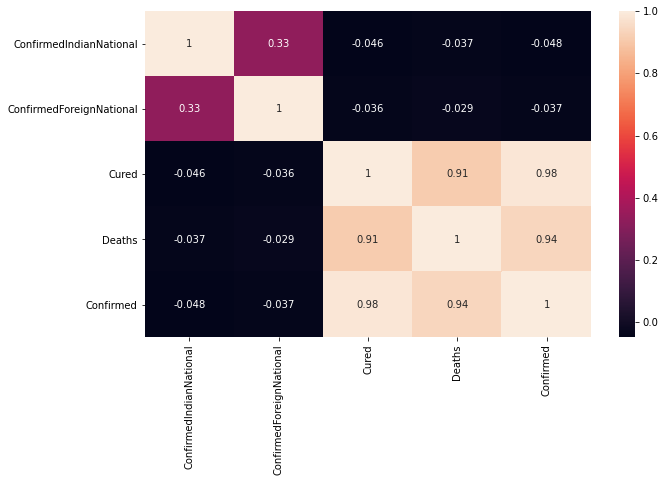

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(corona.corr(),annot=True)

### Hypothesis Test

In [13]:
hypocol=corona.columns.tolist()[4:]
#print("Required Fetures for Hypothesis Tests: \n\n",hypocol)
x=hypocol.pop(2)
hypocol.append(x)
print("Required Fetures for Hypothesis Tests: \n\n",hypocol)

Required Fetures for Hypothesis Tests: 

 ['ConfirmedIndianNational', 'ConfirmedForeignNational', 'Deaths', 'Confirmed', 'Cured']


#### T-Test between the features with Cured

In [14]:
allp=[]
for i in hypocol[:-1]:
    ttest,pval = ttest_rel(corona[i], corona['Cured'])
    print("P-Value of '{}' with '{}' is = {}.".format(i,"Cured",pval))
    allp.append(pval)
print("=========================================================================")
alpha=0.05
for i in range(len(hypocol[:-1])):
    if allp[i]<=alpha:
        print("'{}' is Significantly related to '{}'.".format(hypocol[:-1][i],"Cured"))
    else:
        print("'{}' is not Significantly related to '{}'.".format(hypocol[:-1][i],"Cured"))

P-Value of 'ConfirmedIndianNational' with 'Cured' is = 1.9391545626425418e-75.
P-Value of 'ConfirmedForeignNational' with 'Cured' is = 1.742383849507003e-75.
P-Value of 'Deaths' with 'Cured' is = 1.6696349114326622e-76.
P-Value of 'Confirmed' with 'Cured' is = 2.9732361989323567e-81.
'ConfirmedIndianNational' is Significantly related to 'Cured'.
'ConfirmedForeignNational' is Significantly related to 'Cured'.
'Deaths' is Significantly related to 'Cured'.
'Confirmed' is Significantly related to 'Cured'.


### Testing with Linear Regression

In [15]:
X=corona[hypocol[:-1]]
y=corona['Cured']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

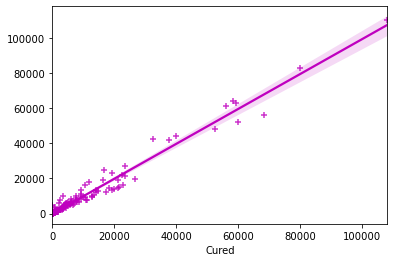

In [16]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred=lm.predict(X_test)
ax = sns.regplot(x=y_test, y=y_pred,color="m",marker="+")

In [17]:
print("Model Score: ",round(lm.score(X_test,y_test)*100),"%")

Model Score:  98 %


### Testing with Support Vector Regressor

Model Score:  40 %


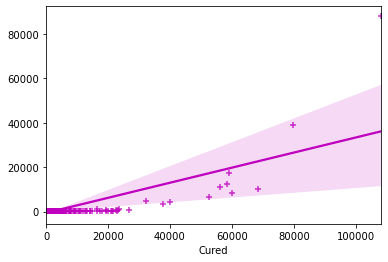

In [18]:
sv = SVR( kernel='poly', degree=3, gamma='scale',)
sv.fit(X_train, y_train)
y_pred1=sv.predict(X_test)
ax = sns.regplot(x=y_test, y=y_pred1,color="m",marker="+")
print("Model Score: ",round(sv.score(X_test,y_test)*100),"%")

### Testing with Decision Tree Regressor

Model Score:  96 %


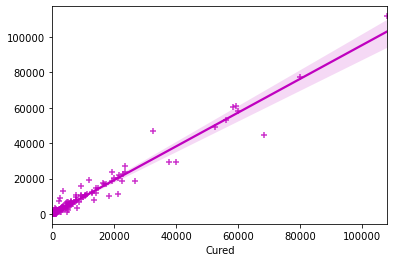

In [19]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred2=dtr.predict(X_test)
ax = sns.regplot(x=y_test, y=y_pred2,color="m",marker="+")
print("Model Score: ",round(dtr.score(X_test,y_test)*100),"%")

### Testing with Random Forest Regressor

Model Score:  98 %


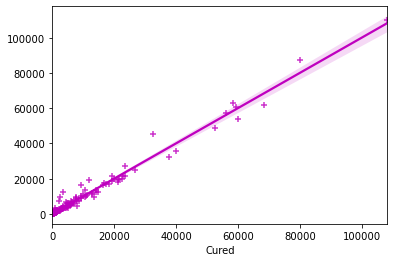

In [20]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred3=rfr.predict(X_test)
ax = sns.regplot(x=y_test, y=y_pred3,color="m",marker="+")
print("Model Score: ",round(rfr.score(X_test,y_test)*100),"%")

### Apply MLP here

Model Score:  98 %


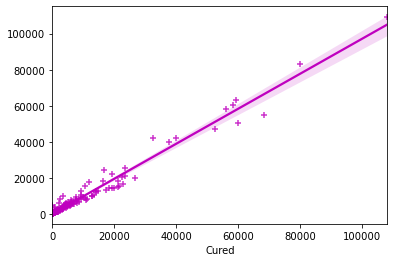

In [21]:
mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_pred4 = mlp.predict(X_test)
hx = sns.regplot(x=y_test, y=y_pred4,color="m",marker="+")
print("Model Score: ",round(mlp.score(X_test, y_test)*100),"%")


### Apply Ridge Regression here

Model Score:  98 %


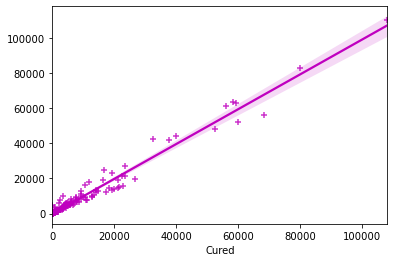

In [22]:
rid = Ridge()
rid.fit(X_train, y_train)
y_pred5 = rid.predict(X_test)
kx = sns.regplot(x=y_test, y=y_pred5,color="m",marker="+")
print("Model Score: ",round(rid.score(X_test, y_test)*100),"%")

### Apply Lasso Regression here